In [1]:
# 数据无量纲化

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
import numpy as np
X = np.array(data)

In [2]:
X

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [9]:
(X - X.min(axis = 0))/(X.max(axis = 0) - X.min(axis = 0))

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [10]:
# 归一化
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler().fit(X)
mms.transform(X)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [12]:
# 标准化
(X - X.mean(axis = 0))/X.std(axis = 0)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [13]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler().fit(X)
std.transform(X)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [19]:
# 先归一，再标准
# StandardScaler().fit_transform(MinMaxScaler().fit_transform(X))
# MinMaxScaler().fit_transform(StandardScaler().fit_transform(X))

In [21]:
# 1.生成100个随机数
# 2.绘制这100个数的直方图
# 3.对数据进行标准化处理
# 4.再次绘制标准化处理过后的直方图

import matplotlib.pyplot as plt 

(array([11.,  6.,  9., 12.,  7., 13., 12., 10., 10., 10.]),
 array([0.00217928, 0.10191439, 0.20164949, 0.3013846 , 0.4011197 ,
        0.50085481, 0.60058991, 0.70032502, 0.80006012, 0.89979523,
        0.99953033]),
 <a list of 10 Patch objects>)

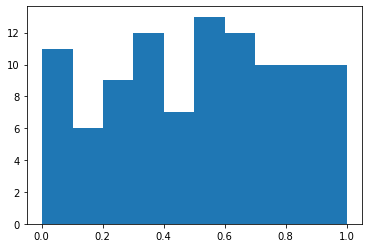

In [28]:
# 查看分布

a = np.random.rand(100)
plt.hist(a)

(array([11.,  6.,  9., 12.,  7., 13., 12., 10., 10., 10.]),
 array([-1.7902438 , -1.44302961, -1.09581542, -0.74860123, -0.40138704,
        -0.05417285,  0.29304134,  0.64025552,  0.98746971,  1.3346839 ,
         1.68189809]),
 <a list of 10 Patch objects>)

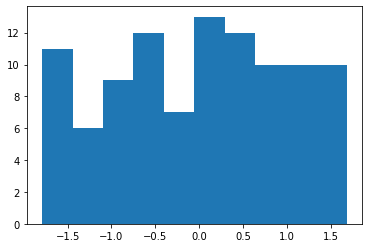

In [29]:
# 做完标准化之后查看分布

std = StandardScaler().fit(a.reshape(-1,1))
stda = std.transform(a.reshape(-1,1))
plt.hist(stda)

(array([11.,  6.,  9., 12.,  7., 13., 12., 10., 10., 10.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

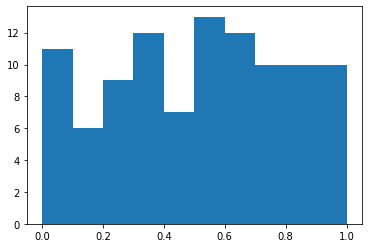

In [30]:
# 做归一化之后，分布式是否变化
mms = MinMaxScaler().fit(a.reshape(-1,1))
mmsa = mms.transform(a.reshape(-1,1))
plt.hist(mmsa)

In [155]:
# 缺失值的处理

import pandas as pd
data = pd.read_csv("Narrativedata.csv")
data

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No
...,...,...,...,...
886,27.0,male,S,No
887,19.0,female,S,Yes
888,NaN,female,S,No
889,26.0,male,C,Unknown


In [156]:
#查看缺失值
#data.info()

#Tips:缺失值比例
data.isna().mean()

Age         0.198653
Sex         0.000000
Embarked    0.002245
Survived    0.000000
dtype: float64

In [157]:
# 有的列里面虽然是没有np.nan,但是很可能当前缺失值是以字符串的形式存在数据里面
# 单独将这一列拿出来，做一个value_counts的动作
data['Survived'].value_counts()

No         486
Yes        310
Unknown     95
Name: Survived, dtype: int64

In [158]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [159]:
# 使用SimpleImputer
from sklearn.impute import SimpleImputer

# 使用中位数填补Age
Age = data['Age'].values.reshape(-1, 1)
imp_median = SimpleImputer(strategy = 'median').fit(Age)
data['Age'] = imp_median.transform(Age)

# 如果想用常数来填补空缺值的话，策略参数为constant,并且和fill_value一起使用，指定想填补常数
# SimpleImputer(strategy = 'constant', fill_value = 0)     #fillna(0)

# 使用众数填补Embarked
Embarked = data['Embarked'].values.reshape(-1,1)
imp_freq = SimpleImputer(strategy = 'most_frequent').fit(Embarked)
data['Embarked'] = imp_freq.transform(Embarked)

# 对Y值进行空缺值填补
Survived = data['Survived'].values.reshape(-1, 1)
imp_s = SimpleImputer(missing_values = 'Unknown', strategy = 'most_frequent').fit(Survived)
data['Survived'] = imp_s.transform(Survived)

In [160]:
# 编码与哑变量

# preprocessing.LabelEncoder：标签专用，能够将分类转换为分类数值
from sklearn.preprocessing import LabelEncoder
y = data['Survived']     # 不必要进行reshape,转换二维数组的形式
le = LabelEncoder().fit(y)
data['Survived'] = le.transform(y)

In [161]:
# 想写出一种代码，自动化的判断当前这个一列下面的离散的类别，自动生成replace可以用到的做编码的字典，从而对任意一个数据，都可以自动化的完成编码的操作
# d = data['Sex'].value_counts()
# data['Sex'].replace(pd.Series(range(len(d)), index = d.index))

In [162]:
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,1
2,26.0,female,S,1
3,35.0,female,S,1
4,35.0,male,S,0


In [163]:
# preprocessing.OrdinalEncoder：特征专用，能够将离散特征转换为分类数值
from sklearn.preprocessing import OrdinalEncoder

data_ = data[['Sex', 'Embarked']]
data_

oe = OrdinalEncoder().fit(data_)
sex_embarked = oe.transform(data_)

# 0301期张传鹏， 使用pd.factorize
#data_.apply(lambda col : pd.factorize(col)[0], axis = 0)

sex_embarked

array([[1., 2.],
       [0., 0.],
       [0., 2.],
       ...,
       [0., 2.],
       [1., 0.],
       [1., 1.]])

In [164]:
# 如何知道转换之后，每一个编码它代表的是原来什么值
oe.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [165]:
# preprocessing.OneHotEncoder：独热编码，创建哑变量
data_ = data[['Sex', 'Embarked']]

from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder().fit(data_)
one_hot_results = onehot.transform(data_).toarray()

In [183]:
features = np.array(['Sex', 'Embarked'])
features = np.array([i + '_' for i in features])
one_hot_features = np.array(onehot.categories_)
colnames = np.append(*features + one_hot_features)

In [191]:
# 将onehot_result做成dataframe，并且添加上这个是正确的原始的列名
one_hot_df = pd.DataFrame(one_hot_results, columns = colnames)

# 用pd.concat进行拼接
data_new = pd.concat([data, one_hot_df], axis = 1)

In [192]:
data_new.columns

Index(['Age', 'Sex', 'Embarked', 'Survived', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [193]:
# 将当前的data中列名里的标签给pop出来，用lable变量接住
data_new = data_new.drop(['Sex', 'Embarked'], axis = 1)

# 使用pandas的reindex的方式来按col_name重新排序列名
data_new.reindex(['Age', 'Sex_female', 'Sex_male','Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived'], axis = 1)

,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,22.0,0.0,1.0,0.0,0.0,1.0,0
1,38.0,1.0,0.0,1.0,0.0,0.0,1
2,26.0,1.0,0.0,0.0,0.0,1.0,1
3,35.0,1.0,0.0,0.0,0.0,1.0,1
4,35.0,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
886,27.0,0.0,1.0,0.0,0.0,1.0,0
887,19.0,1.0,0.0,0.0,0.0,1.0,1
888,28.0,1.0,0.0,0.0,0.0,1.0,0
889,26.0,0.0,1.0,1.0,0.0,0.0,0


In [13]:
# 处理连续型特征：二值化与分段¶
# sklearn.preprocessing.Binarizer：根据阈值将数据二值化，特征专用

# 首先提取出当前的age这一列，一般做预处理，如果只是对一列进行转换的话，需要做reshape的动作，将一个维数据转换成竖着的形式的二维数据

from sklearn.preprocessing import Binarizer
# 实例化并且转换


In [14]:
# preprocessing.KBinsDiscretizer：将连续变量划分为分类变量

# 实例化并且转换


In [15]:
# 是不是和连续变量用lasso那个含义是一样的?

# 特征选择

# filter过滤法¶

# 方差过滤


# 将特征减少一半

# get_support

In [16]:
# 相关性过滤

# 卡方检验



# 假设在这里，已知需要300个特征

# 验证模型效果，使用随机森林

In [17]:
# F检验


In [18]:
# 互信息法



In [19]:
# Embedded潜入法


In [20]:
# 包装法


# .ranking_

In [21]:
# 降维方法



In [22]:
# 我们首先拿到一个数据集，算出它的协方差矩阵


In [23]:
# 尝试看一下PCA的结果


# 给出PCA的特征值


In [24]:
# 特征值形成对角矩阵, 记做D



In [25]:
# 取出特征向量, 记做P


In [26]:
# 验证是否 P.T * D * P = 方差矩阵



In [27]:
#  验证新的特征是否是有(X - X每个特征平均值) * P.T得到, 数据太多，取前三行


In [28]:
# 取出PCA包的结果，查看是否一致，数据太多，取前五行


In [29]:
# 选出最好的n_components


In [30]:
# 最大似然估计自选超参数?


In [ ]:
# 按信息量占比选超参数

In [31]:
# PCA对手写数据集的降维



In [32]:
#画累计方差贡献率曲线，找最佳降维后维度的范围


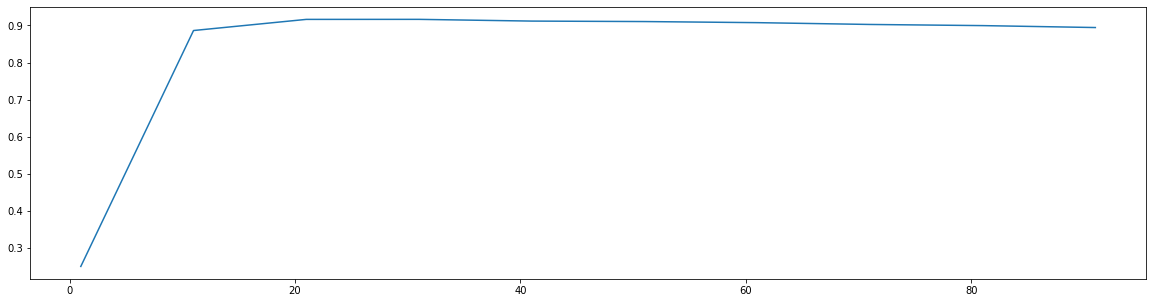

In [44]:
#降维后维度的学习曲线，继续缩小最佳维度的范围
#======【TIME WARNING：2mins 30s】======#

score = []
for i in range(1,101,10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0)
                           ,X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()

In [72]:
#导入找出的最佳维度进行降维，查看模型效果
X_dr = PCA(23).fit_transform(X)

#======【TIME WARNING:1mins 30s】======#
cross_val_score(RFC(n_estimators=100,random_state=0),X_dr,y,cv=5).mean()

